In [1]:
debug=False

In [2]:
# import os, time, datetime

import sys
sys.path.append("Modules")

from INOSerial import *
from HPIB4155 import *
from HPIB_plot import*

GPIBch='GPIB0::17'
INOch='COM3'

timeout=30

ptype=False

VGS = {
    'enable' : True,
    'VGstart' : 0, 'VGstop' : 1.5, 'VGstep' : 0.01,
    'VD' : '25m', 'Compliance' : '1.5m'
    }

# SubVt = {
#     'enable' : True,
#     'VGstart' : Vt-0.2, 'VGstop' : Vt+0.2, 'VGstep' : '1m',
#     'VD' : '10m', 'Compliance' : '10m'
#     }
    
VGS_sat = {
    'enable' : True,
    'VGstart' : 0, 'VGstop' : 1.5, 'VGstep' : 0.01,
    'VD' : 1.5, 'Compliance' : '1.5m'
    }

VDS = {
    'enable' : True,
    'VDstart' : 0, 'VDstop' : 1.5, 'VDstep' : 0.01,
    'VGstart' : 0.9, 'VGstop' : 1.5, 'VGstep' : 0.15,
    'Compliance' : '1.5m'
    }

Ex_Ib = {
    'enable' : True,
    'VSstart' : 0, 'VSstop' : 1.5, 'VSstep' : 0.01,
    'VGstart' : 1.3, 'VGstop' : 1.5, 'VGstep' : 0.1,
    'Compliance' : '1.5m'
    }

VP = {
    'enable' : True,
    'VGstart' : -1.5, 'VGstop' : 1.5, 'VGstep' : 0.01,
    'Ib' : -2.98e-06, 'Compliance' : 1.5
    }

In [3]:
VP

{'enable': True,
 'VGstart': -1.5,
 'VGstop': 1.5,
 'VGstep': 0.01,
 'Ib': -2.98e-06,
 'Compliance': 1.5}

In [4]:
HP=HP4155(GPIBch, debug=debug)
HP.StopFlag=False

HP.reset()

HP.beep()

print(HP.ask(":PAGE:MEAS:MSET:ITIM?"))

SHOR


In [5]:
prefix=input()

now=datetime.datetime.now().strftime('%y%m%d')
if os.path.isdir('C:/Users/Zucchi/Documents/Medidas'):
    path='C:/Users/Zucchi/Documents/Medidas'
else: 
    path="C:/Users/Zucchi-Note/Dropbox/Cryochip/Medidas"

path+=f"/{prefix}/{now}/csv/"

print(path)

os.makedirs(path, exist_ok=True)

 TN2 RT


C:/Users/Zucchi/Documents/Medidas/TN2 RT/231106/csv/


In [6]:
if False:
    if ptype:
        HP.SetDiode(0, 1.5, 0.05)
    else:
        HP.SetDiode(0, -1.5, 0.05)
    HP.SetIntTime("SHOR")
    
    now=datetime.datetime.now().strftime("%y%m%d %H%M%S")
    
    plotp=f"{path}{HP.term}-{now}.csv"

    HP.SingleSave(plotp, timeout)
    Plot(plotp, "VF", ["ID", "IS"])
    
HP.SetIntTime("LONG")
HP.ask(":PAGE:MEAS:MSET:ITIM?")

'LONG'

In [ ]:
if VGS['enable']:
    HP.SetVGS(VGS, ptype)
    
    now=datetime.datetime.now().strftime("%y%m%d %H%M%S")
    
    plotp=f"{path}{HP.term}-{now}.csv"

In [ ]:
if VGS['enable']:
    HP.SingleSave(plotp, timeout)
    VTO=PlotVgs(plotp)
    print(VTO)

if VGS['enable']:
    HP.SetVgs(0.3*VTO, 0.8*VTO, '2m', VGS['VD'], '1m')
    HP.term='SubVt'
    now=datetime.datetime.now().strftime("%y%m%d %H%M%S")
    
    plotp=f"{path}{HP.term}-{now}.csv"

if VGS['enable']:
    HP.SingleSave(plotp, timeout*60)
    PlotSubVt(plotp)

In [ ]:
if VGS_sat['enable']:
    HP.SetVGS(VGS_sat, ptype)

    now=datetime.datetime.now().strftime("%y%m%d %H%M%S")
    
    plotp=f"{path}{HP.term}-{now}.csv"

In [ ]:
if VGS_sat['enable']:
    HP.SingleSave(plotp, timeout*60)
    PlotVgs(plotp)

In [ ]:
if VDS['enable']:
    HP.SetVDS(VDS, ptype)

    now=datetime.datetime.now().strftime("%y%m%d %H%M%S")
    
    plotp=f"{path}{HP.term}-{now}.csv"

In [ ]:
if VDS['enable']:
    HP.SingleSave(plotp, timeout*60*7)
    Plot(plotp, 'VD', 'ID')

In [7]:
if Ex_Ib['enable']:
    HP.SetEXIB(Ex_Ib, ptype)

    now=datetime.datetime.now().strftime("%y%m%d %H%M%S")
    
    plotp=f"{path}{HP.term}-{now}.csv"

Set Ex_Ib
 Vs=(0, 1.5, 0.01), Vg=(1.3, 1.5, 0.1)


HP Blink 60s
HP Blink 60s
HP Blink 60s
[-3.12984968e-06 -2.97656375e-06 -2.82458831e-06]
Is=-2.98e-06   AbsDev: 3.056982045569891e-07


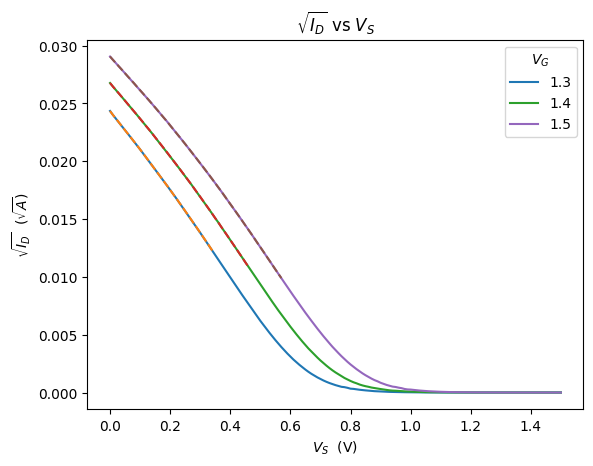

In [8]:
if Ex_Ib['enable']:    
    HP.SingleSave(plotp, timeout*60*7)
    ibcalc=plotp
    VP['Ib']=CalcIs(ibcalc, ptype)

In [7]:
if VP['enable']:
    # VP['Ib']=CalcIb(ibcalc, ptype)
    HP.SetVP(VP, ptype)

    now=datetime.datetime.now().strftime("%y%m%d %H%M%S")
    
    plotp=f"{path}{HP.term}-{now}.csv"

Set VpxVgs
Is=-2.98e-06, Vg=(-1.5, 1.5, 0.01), Vlim=1.5


HP Blink 60s
HP Blink 60s


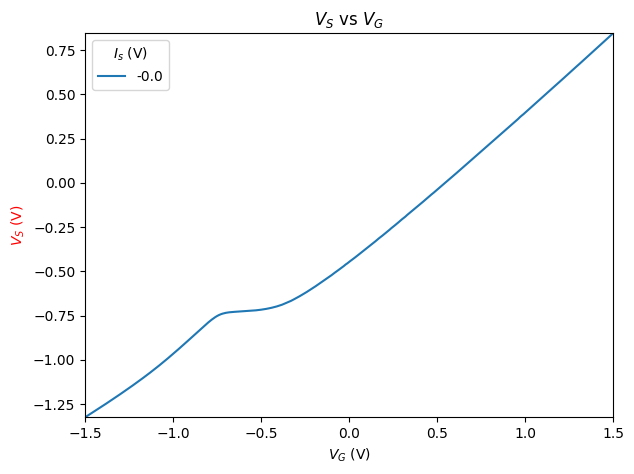

In [8]:
if VP['enable']: 
    HP.SingleSave(plotp, timeout*60)
    Plot(plotp, 'VG', 'VS')